In [10]:
import pynbody
import pynbody.plot.sph as sph
import pynbody.plot as pp
from pynbody.analysis import profile
import matplotlib.pylab as plt
import numpy as np

In [11]:
sim = pynbody.load('/home/michele/sim/MoRIA/sim71002/snapshot_0164')

In [12]:
SIM_NUMBER = 71002

In [13]:
data = np.load('cog{}.npz'.format(SIM_NUMBER))
times_moria, cog_moria = data['times'], data['cog']
data = np.load('cog{}_kicked.npz'.format(SIM_NUMBER))
times_kicked, cog_kicked = data['times'], data['cog']

In [14]:
bins_sfr = 100
trange = (min(np.min(times_moria), np.min(times_kicked)), max(np.max(times_moria), np.max(times_kicked)))
trange = (0, min(np.max(times_moria), np.max(times_kicked)))
bins = np.linspace(*trange, bins_sfr)
trange, bins

((0, 13.11397991328508),
 array([  0.        ,   0.13246444,   0.26492889,   0.39739333,
          0.52985777,   0.66232222,   0.79478666,   0.9272511 ,
          1.05971555,   1.19217999,   1.32464444,   1.45710888,
          1.58957332,   1.72203777,   1.85450221,   1.98696665,
          2.1194311 ,   2.25189554,   2.38435998,   2.51682443,
          2.64928887,   2.78175331,   2.91421776,   3.0466822 ,
          3.17914665,   3.31161109,   3.44407553,   3.57653998,
          3.70900442,   3.84146886,   3.97393331,   4.10639775,
          4.23886219,   4.37132664,   4.50379108,   4.63625552,
          4.76871997,   4.90118441,   5.03364886,   5.1661133 ,
          5.29857774,   5.43104219,   5.56350663,   5.69597107,
          5.82843552,   5.96089996,   6.0933644 ,   6.22582885,
          6.35829329,   6.49075773,   6.62322218,   6.75568662,
          6.88815107,   7.02061551,   7.15307995,   7.2855444 ,
          7.41800884,   7.55047328,   7.68293773,   7.81540217,
          7.947

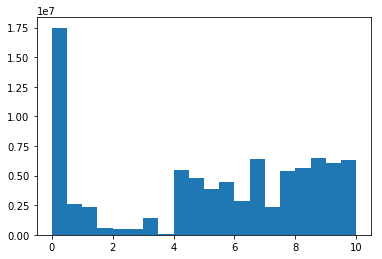

SimArray([ 10575.23925781,  10575.27929688,  10575.25292969, ...,
        10575.05957031,  10576.04003906,  10576.14550781], dtype=float32, 'Msol')

In [16]:
time_bins_length = 0.5
time_max = sim.properties['time'].in_units('Gyr')
time = np.arange(0, time_max, time_bins_length)
# time = np.append(time, time_max)
birthtimes = sim.s['tform'].in_units('Gyr')
masses = sim.s['massform'].in_units('Msol')
SFR, b = np.histogram(birthtimes, bins=time, weights=masses.astype(np.float64))
plt.hist(birthtimes, bins=time, weights=masses)
# plt.plot(b[:-1], SFR)
plt.show()
masses

In [17]:
SFR_mine = np.zeros(len(time), dtype=np.float64)
for birth, mass in zip(birthtimes, masses):
    for idx, t in enumerate(time):
        if 0 < t - birth <= time_bins_length:
            SFR_mine[idx] += mass / (time_bins_length*10.0**9)  # Msol/yr

In [18]:
time[0], time[-1], time_max, time.shape, SFR.shape

(0.0, 10.0, 10.12013221568132, (21,), (20,))

In [19]:
# Last bin is different
time[-1]-time[-2]

0.5

In [20]:
SFR/1e9, SFR_mine[1:], SFR.shape, SFR_mine.shape

(array([  1.74918795e-02,   2.62298606e-03,   2.33743242e-03,
          5.50138513e-04,   4.86493582e-04,   5.18423277e-04,
          1.43958111e-03,   7.45727080e-05,   5.46770025e-03,
          4.83301227e-03,   3.87532241e-03,   4.47880196e-03,
          2.86021760e-03,   6.36341982e-03,   2.35463483e-03,
          5.40152266e-03,   5.66368869e-03,   6.51333632e-03,
          6.02404123e-03,   6.28320309e-03]),
 array([ 0.03498376,  0.00524597,  0.00467486,  0.00110028,  0.00097299,
         0.00103685,  0.00287916,  0.00014915,  0.0109354 ,  0.00966602,
         0.00775064,  0.0089576 ,  0.00572044,  0.01272684,  0.00470927,
         0.01080305,  0.01132738,  0.01302667,  0.01204808,  0.01256641]),
 (20,),
 (21,))

In [21]:
masses.sum()/1e9, SFR_mine.sum(), (SFR/1e9).sum() 

(SimArray(0.135706672, 'Msol'), 0.17128081663476541, 0.085640408317382802)

In [22]:
sfr, t = pynbody.plot.sfh(sim, bins=20, cumulative=False, range=(0,10))
SFR, b = np.histogram(birthtimes, bins=time, weights=masses.astype(np.float64),range=(0,10) )
binnorm = ((time[-1]-time[0])/20)*1e-9
SFR, b, sfr, t, binnorm

/home/michele/Software/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = 5.972695e-08
  AccuracyWarning)
/home/michele/Software/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.037007e-09
  AccuracyWarning)
/home/michele/Software/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.825575e-09
  AccuracyWarning)
/home/michele/Software/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = 3.776510e-09
  AccuracyWarning)
/home/michele/Software/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.048614e-08
  AccuracyWarning)


(array([ 17491879.51464844,   2622986.06054688,   2337432.42285156,
           550138.51269531,    486493.58203125,    518423.27734375,
          1439581.10546875,     74572.70800781,   5467700.25195312,
          4833012.27441406,   3875322.40527344,   4478801.96289062,
          2860217.59667969,   6363419.81835938,   2354634.83007812,
          5401522.6640625 ,   5663688.68847656,   6513336.32421875,
          6024041.22753906,   6283203.08984375]),
 array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
          4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
          9. ,   9.5,  10. ]),
 SimArray([ 0.02665603,  0.00399961,  0.00356419,  0.00083887,  0.00074182,
         0.00079051,  0.00219512,  0.00011371,  0.00833732,  0.00736953,
         0.00590921,  0.00682941,  0.00436135,  0.00970314,  0.00359042,
         0.00823641,  0.00863617,  0.00993173,  0.00918564,  0.00958082], 'Msol yr**-1'),
 SimArray([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3.

In [23]:
def binned_sfh(sim, time_max=None, time_bins_length=0.05, max_radius=None, plot_z=True, cumulative=False):
    if max_radius:
        filt = sim.s['rxy'].in_units('kpc') < max_radius
        sim = sim[filt]
        print("{:3d} star particles within radius {:g} kpc".format(len(sim), max_radius))
    
    if time_max is None:
        print("snapshot time {} Gyr".format(sim.properties['time'].in_units('Gyr')))
        time_max = sim.properties['time'].in_units('Gyr')

    # print(filt)
    birthtimes = sim.s['tform']
    masses = sim.s['massform']
    Mstar = sum(masses)

    time = np.arange(0, time_max, time_bins_length)
    nbins = len(time)
    SFR = np.zeros(nbins)

    # Determine the number of stars being formed in each time bin, and so the star formation rate
    for birth, mass in zip(birthtimes, masses):
        for idx, t in enumerate(time):
            if 0 < t - birth < time_bins_length:
                SFR[idx] += mass*10**6 / (time_bins_length*10**9)
                continue
#     SFR = np.hist(birthtimes, bins=time, weights=masses)
    
    
    # get the cumulative star formation history
    if cumulative:
        SFH = np.cumsum(SFR)
    else:
        SFH = SFR * time_bins_length * 10**3 / Mstar

    lookback_time = [time_max - t for t in time]
    if max_radius:
        print('Mstar = {:.4f}  at maxRadius = {}'.format(Mstar, max_radius))
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(lookback_time, SFH, 'b-')

    ax.set_xlabel('$t_\mathrm{lookback}\ \mathrm{[Gyr]}$')
    if max_radius:
        y_label = '$f_\star(R<{}~\mathrm{{kpc}})$'.format(max_radius)
    else:
        y_label = '$f_\star$'
    ax.set_ylabel(y_label)
    ax.set_xlim(time_max, 0)
    if cumulative:
        ax.set_ylim(0,1.)
        # Plot the case of a constant SFR over time
        ax.plot([time_max, 0], [0, 1], '--', color='k', linewidth=2)
    
    # Plot redshift
    if plot_z:
        from pynbody.analysis import pkdgrav_cosmo as cosmo
        # Use default cosmology
        # do not use sim as input because sim.properties['omegaM0'] is 1.0 and it should be 0.272
        c = cosmo.Cosmology()

        axz = ax.twiny()
        labelzs = [6, 3, 2, 1, 0]
        times = [13.5 * c.Exp2Time(1.0 / (1 + z)) / c.Exp2Time(1) for z in labelzs]
        axz.set_xticks(times)
        axz.set_xticklabels([str(x) for x in labelzs])
        axz.set_xlabel('$z$')
    return SFH, time

In [25]:
sfr_cum_moria, times_moria = binned_sfh(sim)
sfr_cum_kicked, times_kicked = binned_sfh(sim) # FIXME kicked missing

snapshot time 10.12013221568132 Gyr
snapshot time 10.12013221568132 Gyr


In [26]:
fig = binned_sfh(sim)

snapshot time 10.12013221568132 Gyr
